## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3         X4         Y
0  36.048429  490.606818  0.540511  10.064616  1.538447
1   3.993166  370.365604  0.615918   6.109552  1.440231
2  16.513299  844.829276  0.087334   8.065669  1.366812
3  21.439076  255.320397  0.192808   6.908962  1.139327
4  30.846398  854.191905  0.076773   4.517852  1.171892


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.06309 | train_mse: 8.20709 | train_mae: 1.90851 |  0:00:00s
epoch 1  | loss: 0.42475 | train_mse: 5.15999 | train_mae: 1.53245 |  0:00:00s
epoch 2  | loss: 0.49263 | train_mse: 3.70289 | train_mae: 1.26185 |  0:00:00s


epoch 3  | loss: 0.36379 | train_mse: 1.86477 | train_mae: 0.97419 |  0:00:00s
epoch 4  | loss: 0.34745 | train_mse: 1.47669 | train_mae: 0.8969  |  0:00:00s
epoch 5  | loss: 0.25826 | train_mse: 1.28006 | train_mae: 0.90907 |  0:00:00s


epoch 6  | loss: 0.40481 | train_mse: 0.68552 | train_mae: 0.64977 |  0:00:00s
epoch 7  | loss: 0.24053 | train_mse: 0.58901 | train_mae: 0.58079 |  0:00:00s
epoch 8  | loss: 0.38342 | train_mse: 0.41412 | train_mae: 0.49391 |  0:00:01s


epoch 9  | loss: 0.44356 | train_mse: 0.41297 | train_mae: 0.47642 |  0:00:01s
epoch 10 | loss: 0.50468 | train_mse: 0.6371  | train_mae: 0.59075 |  0:00:01s


epoch 11 | loss: 0.4825  | train_mse: 1.31156 | train_mae: 0.87137 |  0:00:01s
epoch 12 | loss: 0.25226 | train_mse: 1.43536 | train_mae: 0.8825  |  0:00:01s


epoch 13 | loss: 0.49017 | train_mse: 0.85849 | train_mae: 0.6852  |  0:00:01s
epoch 14 | loss: 0.2693  | train_mse: 0.88419 | train_mae: 0.71008 |  0:00:01s
epoch 15 | loss: 0.24852 | train_mse: 0.97545 | train_mae: 0.74839 |  0:00:01s


epoch 16 | loss: 0.3571  | train_mse: 0.77189 | train_mae: 0.65586 |  0:00:01s
epoch 17 | loss: 0.24994 | train_mse: 0.42485 | train_mae: 0.50227 |  0:00:01s
epoch 18 | loss: 0.3274  | train_mse: 0.24948 | train_mae: 0.40302 |  0:00:02s


epoch 19 | loss: 0.1925  | train_mse: 0.26847 | train_mae: 0.42006 |  0:00:02s
epoch 20 | loss: 0.20893 | train_mse: 0.30895 | train_mae: 0.44376 |  0:00:02s
epoch 21 | loss: 0.20525 | train_mse: 0.28373 | train_mae: 0.42213 |  0:00:02s


epoch 22 | loss: 0.14453 | train_mse: 0.25548 | train_mae: 0.41248 |  0:00:02s
epoch 23 | loss: 0.20853 | train_mse: 0.17111 | train_mae: 0.34077 |  0:00:02s
epoch 24 | loss: 0.28454 | train_mse: 0.16393 | train_mae: 0.3239  |  0:00:02s


epoch 25 | loss: 0.16274 | train_mse: 0.173   | train_mae: 0.34341 |  0:00:02s
epoch 26 | loss: 0.18769 | train_mse: 0.1978  | train_mae: 0.36568 |  0:00:02s
epoch 27 | loss: 0.16348 | train_mse: 0.16451 | train_mae: 0.32632 |  0:00:02s


epoch 28 | loss: 0.19413 | train_mse: 0.15413 | train_mae: 0.31392 |  0:00:02s
epoch 29 | loss: 0.2618  | train_mse: 0.18851 | train_mae: 0.33682 |  0:00:03s
epoch 30 | loss: 0.17626 | train_mse: 0.20218 | train_mae: 0.34927 |  0:00:03s


epoch 31 | loss: 0.1435  | train_mse: 0.19298 | train_mae: 0.33658 |  0:00:03s
epoch 32 | loss: 0.29578 | train_mse: 0.16421 | train_mae: 0.31744 |  0:00:03s
epoch 33 | loss: 0.23546 | train_mse: 0.17824 | train_mae: 0.33239 |  0:00:03s


epoch 34 | loss: 0.2116  | train_mse: 0.16193 | train_mae: 0.31956 |  0:00:03s
epoch 35 | loss: 0.24577 | train_mse: 0.14482 | train_mae: 0.3142  |  0:00:03s
epoch 36 | loss: 0.19313 | train_mse: 0.14742 | train_mae: 0.31658 |  0:00:03s


epoch 37 | loss: 0.18027 | train_mse: 0.12249 | train_mae: 0.28732 |  0:00:03s
epoch 38 | loss: 0.23152 | train_mse: 0.11561 | train_mae: 0.27758 |  0:00:03s
epoch 39 | loss: 0.34237 | train_mse: 0.12968 | train_mae: 0.29494 |  0:00:03s


epoch 40 | loss: 0.28398 | train_mse: 0.12525 | train_mae: 0.29023 |  0:00:03s
epoch 41 | loss: 0.41285 | train_mse: 0.10027 | train_mae: 0.26106 |  0:00:04s
epoch 42 | loss: 0.25411 | train_mse: 0.10468 | train_mae: 0.26393 |  0:00:04s


epoch 43 | loss: 0.26168 | train_mse: 0.11729 | train_mae: 0.28953 |  0:00:04s
epoch 44 | loss: 0.23189 | train_mse: 0.12505 | train_mae: 0.29302 |  0:00:04s
epoch 45 | loss: 0.17908 | train_mse: 0.12446 | train_mae: 0.2902  |  0:00:04s


epoch 46 | loss: 0.18281 | train_mse: 0.11095 | train_mae: 0.2726  |  0:00:04s
epoch 47 | loss: 0.12773 | train_mse: 0.10208 | train_mae: 0.25496 |  0:00:04s
epoch 48 | loss: 0.13796 | train_mse: 0.08833 | train_mae: 0.24027 |  0:00:04s


epoch 49 | loss: 0.19993 | train_mse: 0.09155 | train_mae: 0.24042 |  0:00:04s
epoch 50 | loss: 0.33798 | train_mse: 0.0913  | train_mae: 0.24092 |  0:00:04s
epoch 51 | loss: 0.10733 | train_mse: 0.10565 | train_mae: 0.24974 |  0:00:04s


epoch 52 | loss: 0.27107 | train_mse: 0.12518 | train_mae: 0.26239 |  0:00:04s
epoch 53 | loss: 0.16385 | train_mse: 0.13615 | train_mae: 0.2809  |  0:00:05s
epoch 54 | loss: 0.30412 | train_mse: 0.14037 | train_mae: 0.27838 |  0:00:05s


epoch 55 | loss: 0.18627 | train_mse: 0.14121 | train_mae: 0.27602 |  0:00:05s
epoch 56 | loss: 0.44114 | train_mse: 0.13432 | train_mae: 0.27003 |  0:00:05s
epoch 57 | loss: 0.24546 | train_mse: 0.1032  | train_mae: 0.25183 |  0:00:05s


epoch 58 | loss: 0.14703 | train_mse: 0.10223 | train_mae: 0.24496 |  0:00:05s
epoch 59 | loss: 0.22639 | train_mse: 0.10995 | train_mae: 0.25275 |  0:00:05s


epoch 60 | loss: 0.24837 | train_mse: 0.15054 | train_mae: 0.28636 |  0:00:05s
epoch 61 | loss: 0.31668 | train_mse: 0.17822 | train_mae: 0.29422 |  0:00:05s


epoch 62 | loss: 0.18497 | train_mse: 0.18138 | train_mae: 0.30143 |  0:00:05s
epoch 63 | loss: 0.18405 | train_mse: 0.16121 | train_mae: 0.28607 |  0:00:05s
epoch 64 | loss: 0.1424  | train_mse: 0.10965 | train_mae: 0.26087 |  0:00:06s


epoch 65 | loss: 0.15235 | train_mse: 0.1048  | train_mae: 0.25298 |  0:00:06s
epoch 66 | loss: 0.18604 | train_mse: 0.09539 | train_mae: 0.2422  |  0:00:06s


epoch 67 | loss: 0.13446 | train_mse: 0.08727 | train_mae: 0.23359 |  0:00:06s
epoch 68 | loss: 0.29586 | train_mse: 0.08158 | train_mae: 0.22703 |  0:00:06s
epoch 69 | loss: 0.08687 | train_mse: 0.09874 | train_mae: 0.24746 |  0:00:06s


epoch 70 | loss: 0.10477 | train_mse: 0.10164 | train_mae: 0.25024 |  0:00:06s
epoch 71 | loss: 0.1379  | train_mse: 0.09284 | train_mae: 0.24316 |  0:00:06s
epoch 72 | loss: 0.1509  | train_mse: 0.09168 | train_mae: 0.23706 |  0:00:06s


epoch 73 | loss: 0.14419 | train_mse: 0.08239 | train_mae: 0.21949 |  0:00:06s
epoch 74 | loss: 0.26705 | train_mse: 0.09329 | train_mae: 0.23886 |  0:00:06s
epoch 75 | loss: 0.23812 | train_mse: 0.08923 | train_mae: 0.23545 |  0:00:07s


epoch 76 | loss: 0.28721 | train_mse: 0.11277 | train_mae: 0.26269 |  0:00:07s
epoch 77 | loss: 0.14046 | train_mse: 0.10202 | train_mae: 0.24401 |  0:00:07s
epoch 78 | loss: 0.24145 | train_mse: 0.10392 | train_mae: 0.25373 |  0:00:07s


epoch 79 | loss: 0.09251 | train_mse: 0.08267 | train_mae: 0.22891 |  0:00:07s
epoch 80 | loss: 0.11889 | train_mse: 0.06801 | train_mae: 0.20865 |  0:00:07s
epoch 81 | loss: 0.13466 | train_mse: 0.0652  | train_mae: 0.20139 |  0:00:07s


epoch 82 | loss: 0.11322 | train_mse: 0.06711 | train_mae: 0.20325 |  0:00:07s
epoch 83 | loss: 0.17628 | train_mse: 0.08473 | train_mae: 0.22736 |  0:00:07s
epoch 84 | loss: 0.19515 | train_mse: 0.07466 | train_mae: 0.2102  |  0:00:07s


epoch 85 | loss: 0.23282 | train_mse: 0.06699 | train_mae: 0.19565 |  0:00:07s
epoch 86 | loss: 0.16703 | train_mse: 0.09859 | train_mae: 0.22805 |  0:00:08s
epoch 87 | loss: 0.14024 | train_mse: 0.17328 | train_mae: 0.28345 |  0:00:08s


epoch 88 | loss: 0.21145 | train_mse: 0.15112 | train_mae: 0.27873 |  0:00:08s
epoch 89 | loss: 0.28056 | train_mse: 0.13817 | train_mae: 0.27627 |  0:00:08s
epoch 90 | loss: 0.15158 | train_mse: 0.11549 | train_mae: 0.24474 |  0:00:08s


epoch 91 | loss: 0.12885 | train_mse: 0.12037 | train_mae: 0.24724 |  0:00:08s
epoch 92 | loss: 0.10268 | train_mse: 0.12213 | train_mae: 0.25175 |  0:00:08s
epoch 93 | loss: 0.17138 | train_mse: 0.10963 | train_mae: 0.25065 |  0:00:08s


epoch 94 | loss: 0.15899 | train_mse: 0.11546 | train_mae: 0.25406 |  0:00:08s
epoch 95 | loss: 0.14598 | train_mse: 0.09998 | train_mae: 0.24372 |  0:00:08s
epoch 96 | loss: 0.37025 | train_mse: 0.08877 | train_mae: 0.23116 |  0:00:08s


epoch 97 | loss: 0.22596 | train_mse: 0.07601 | train_mae: 0.2129  |  0:00:08s
epoch 98 | loss: 0.24276 | train_mse: 0.07422 | train_mae: 0.20649 |  0:00:09s
epoch 99 | loss: 0.2333  | train_mse: 0.08293 | train_mae: 0.21474 |  0:00:09s


epoch 100| loss: 0.14793 | train_mse: 0.1046  | train_mae: 0.2433  |  0:00:09s
epoch 101| loss: 0.12223 | train_mse: 0.12234 | train_mae: 0.25997 |  0:00:09s
epoch 102| loss: 0.1715  | train_mse: 0.11287 | train_mae: 0.25055 |  0:00:09s


epoch 103| loss: 0.09411 | train_mse: 0.14156 | train_mae: 0.27342 |  0:00:09s
epoch 104| loss: 0.17418 | train_mse: 0.13214 | train_mae: 0.26978 |  0:00:09s
epoch 105| loss: 0.16073 | train_mse: 0.14095 | train_mae: 0.28515 |  0:00:09s


epoch 106| loss: 0.13926 | train_mse: 0.09498 | train_mae: 0.2432  |  0:00:09s
epoch 107| loss: 0.14813 | train_mse: 0.09667 | train_mae: 0.2386  |  0:00:09s
epoch 108| loss: 0.13128 | train_mse: 0.0806  | train_mae: 0.21567 |  0:00:09s


epoch 109| loss: 0.06915 | train_mse: 0.095   | train_mae: 0.23028 |  0:00:10s
epoch 110| loss: 0.17793 | train_mse: 0.16892 | train_mae: 0.26903 |  0:00:10s
epoch 111| loss: 0.2424  | train_mse: 0.17565 | train_mae: 0.27049 |  0:00:10s


epoch 112| loss: 0.15398 | train_mse: 0.13399 | train_mae: 0.24652 |  0:00:10s
epoch 113| loss: 0.11142 | train_mse: 0.11083 | train_mae: 0.23983 |  0:00:10s
epoch 114| loss: 0.22872 | train_mse: 0.12154 | train_mae: 0.24428 |  0:00:10s


epoch 115| loss: 0.15438 | train_mse: 0.09878 | train_mae: 0.22718 |  0:00:10s
epoch 116| loss: 0.11206 | train_mse: 0.12495 | train_mae: 0.26141 |  0:00:10s
epoch 117| loss: 0.10335 | train_mse: 0.14189 | train_mae: 0.27284 |  0:00:10s


epoch 118| loss: 0.2224  | train_mse: 0.13002 | train_mae: 0.26656 |  0:00:10s
epoch 119| loss: 0.30378 | train_mse: 0.10268 | train_mae: 0.23998 |  0:00:10s
epoch 120| loss: 0.15753 | train_mse: 0.11083 | train_mae: 0.2535  |  0:00:11s


epoch 121| loss: 0.15823 | train_mse: 0.08738 | train_mae: 0.22429 |  0:00:11s
epoch 122| loss: 0.10539 | train_mse: 0.07377 | train_mae: 0.20622 |  0:00:11s
epoch 123| loss: 0.16735 | train_mse: 0.07201 | train_mae: 0.21395 |  0:00:11s


epoch 124| loss: 0.1115  | train_mse: 0.07203 | train_mae: 0.2106  |  0:00:11s
epoch 125| loss: 0.12722 | train_mse: 0.10393 | train_mae: 0.24403 |  0:00:11s
epoch 126| loss: 0.12331 | train_mse: 0.09653 | train_mae: 0.23965 |  0:00:11s


epoch 127| loss: 0.1655  | train_mse: 0.09449 | train_mae: 0.23524 |  0:00:11s
epoch 128| loss: 0.14219 | train_mse: 0.0843  | train_mae: 0.22566 |  0:00:11s
epoch 129| loss: 0.12926 | train_mse: 0.0835  | train_mae: 0.22655 |  0:00:11s


epoch 130| loss: 0.11344 | train_mse: 0.07967 | train_mae: 0.22316 |  0:00:11s
epoch 131| loss: 0.21658 | train_mse: 0.06604 | train_mae: 0.20488 |  0:00:11s
epoch 132| loss: 0.46354 | train_mse: 0.07103 | train_mae: 0.21053 |  0:00:12s


epoch 133| loss: 0.17232 | train_mse: 0.07184 | train_mae: 0.21108 |  0:00:12s
epoch 134| loss: 0.18727 | train_mse: 0.06821 | train_mae: 0.20002 |  0:00:12s
epoch 135| loss: 0.11467 | train_mse: 0.07555 | train_mae: 0.20875 |  0:00:12s

Early stopping occurred at epoch 135 with best_epoch = 85 and best_train_mae = 0.19565
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

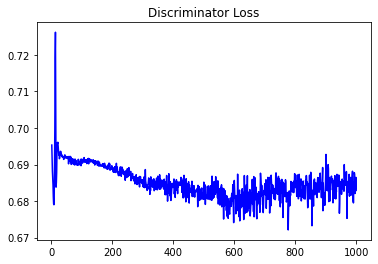

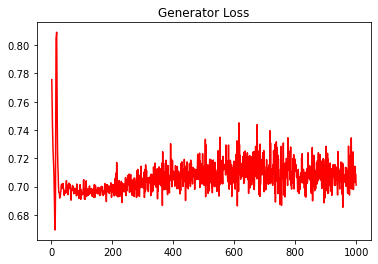

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15846899758827965


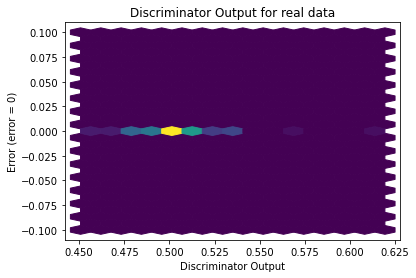

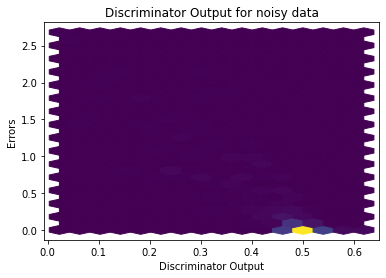

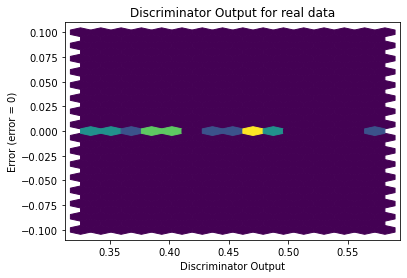

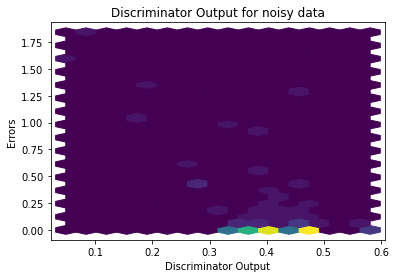

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


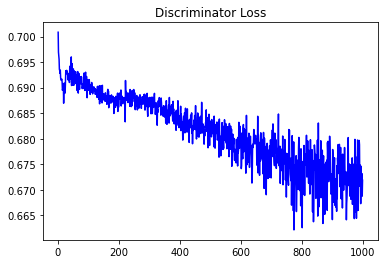

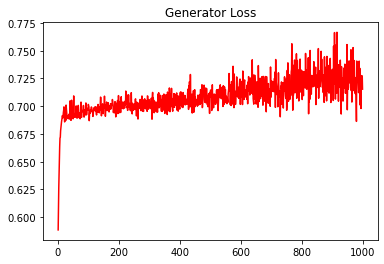

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14762242256852082


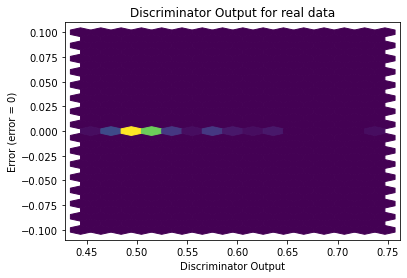

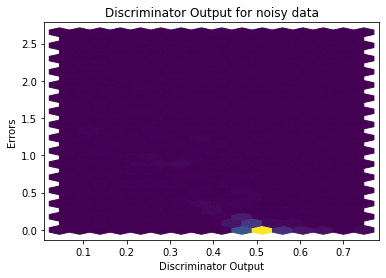

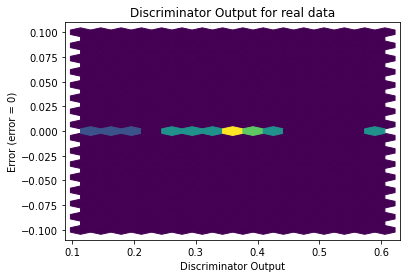

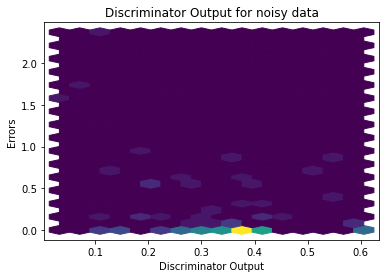

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5309]], requires_grad=True)
